<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Parcial3Dinosaurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Markov : Cadena de Producción
import numpy as np
import matplotlib.pyplot as plt

# a)


In [ ]:
# b)
DictS={0:'Producción',1:'Empaquetado',2:'Mercado'}

In [47]:
# c)
TM = np.array([[0.10,0.90,0.00],\
              [0.00,0.05,0.95],\
              [0.00,0.00,1.00]])

In [20]:
# Hidden Markov: Casino tramposo

# a)
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Moneda=np.array([0,1])
Prior=np.array([0.2,0.8])
Obs=np.array([1,0,0,0,1,0,1,0])

T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

DictHidden = {0:'Justa',1:'Sesgada'}

DictObs = {0:'Cara',1:'Sello'}

def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

HiddenStates=GetStates(Moneda,8)

# b)
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.

  p *= Prior[ State[0] ]

  for i in range(n-1):
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p

P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

ii = np.where( P == np.max(P) )
print(HiddenStates[ii],P[ii])

[[1 1 1 1 0 0 0 0]] [0.0001911]


In [18]:
# c)
import pandas as pd
ObsStates = GetStates([0,1],8)
ObsStates

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

def data_20(ObsStates,PObs):
  t=0
  for i in range(len(PObs)):
    t += PObs[i]
    if t >= 0.2:
      break
  df = pd.DataFrame(ObsStates[:i+1])
  df['Probabilidad'] = PObs[:i+1]
  df = df.sort_values(by='Probabilidad',ascending=False)
  df['suma'] = df['Probabilidad'].cumsum()
  current_columns = df.columns.tolist()
  num_existing_columns = len(current_columns)
  new_columns = ['Secuencia','Probabilidad','Suma'] + current_columns[3:]
  df.columns = new_columns
  return df

data_20(ObsStates,PObs)

,Secuencia,Probabilidad,Suma,3,4,5,6,7,Probabilidad,suma
0,0,0,0,0,0,0,0,0,0.136982,0.136982
1,0,0,0,0,0,0,0,1,0.041149,0.178132
2,0,0,0,0,0,0,1,0,0.034737,0.212869


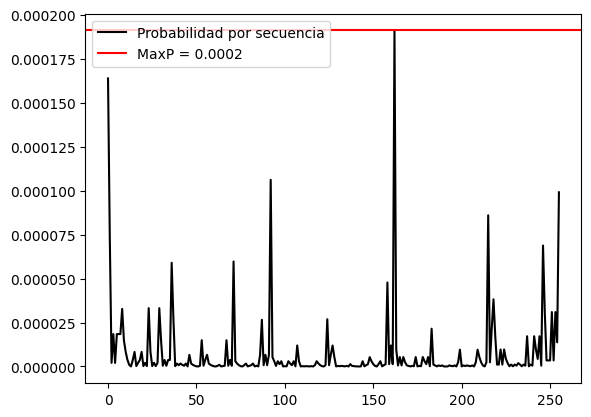

In [21]:
# d)
plt.plot(P, color='k', label= 'Probabilidad por secuencia')
plt.axhline(np.max(P), color='r', label = 'MaxP = ' + str(np.round(np.max(P),4)))
plt.legend()
plt.show()

In [22]:
# e)
ObsStates = GetStates([0,1],8)
ObsStates

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

In [23]:
# f)
np.sum(PObs)

1.0000000000000007

In [7]:
# g), h)

In [8]:
# Maxwell-Boltzmann distribution

#a)
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"

# Leer el archivo CSV directamente en un DataFrame
df = pd.read_csv(url)

# Guardar el DataFrame como un archivo CSV
df.to_csv('Maxwell.csv', index=False)

Maxwell = pd.read_csv('Maxwell.csv')
Maxwell

,Velocidad
0,547.265773
1,449.920418
2,773.814382
3,823.668389
4,352.873887
...,...
2995,601.470068
2996,508.491149
2997,594.981398
2998,376.388615


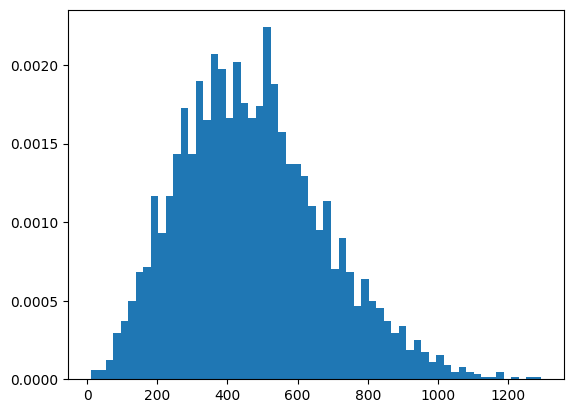

In [9]:
#b)
histograma = plt.hist(Maxwell, bins=60, density=True)

In [10]:
# c)
promedio = np.mean(histograma[0])
promedio

0.0007777147550061165

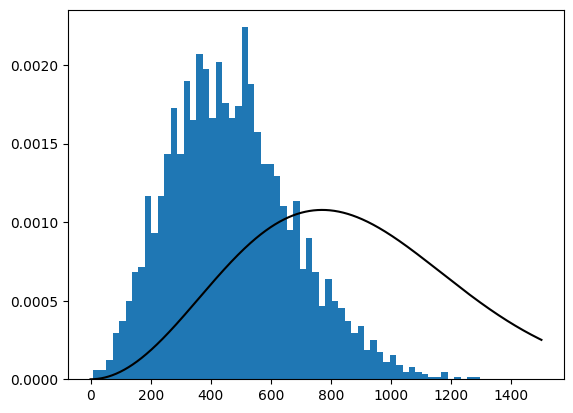

In [11]:
# d)
V = Maxwell['Velocidad']

def likelihood(T,v):
  epsilon = 1e-10  # Un valor pequeño
  result = ((0.028 / (2 * np.pi * 8.31 * T))**(3/2)) * (4 * np.pi * (v**2) * np.exp(-0.028 * v**2 / (2 * 8.31 * T)))
  return result + epsilon  # Sumar epsilon

plt.hist(V, bins=60, density=True)
x=np.linspace(0,1500,1000)
plt.plot(x,likelihood(1000,x), color='k')
plt.show()

In [12]:
# e)
def JointLikelihood(T,v):
  try:
    result = -np.sum(np.log(likelihood(T, v)))
  except ZeroDivisionError:
    result = float('inf')  # Asignar un valor grande en caso de error
  return result

p0 = 100
import scipy.optimize as spo
result = spo.minimize(JointLikelihood,p0,args=(V))
result.x

array([297.89452501])

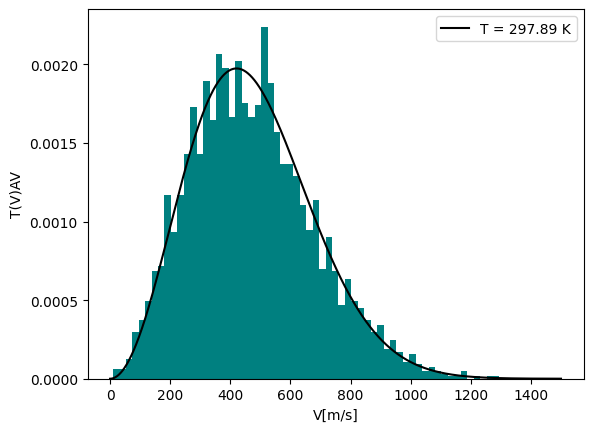

In [13]:
plt.hist(V, bins=60, density=True, color='teal')
x=np.linspace(0,1500,1000)
plt.plot(x,likelihood(result.x,x), color='k', label='T = ' + str(np.round(result.x[0],2)) +" K")
plt.xlabel('V[m/s]')
plt.ylabel('T(V)AV')
plt.legend()
plt.show()

In [14]:
# f)
vp = np.sqrt(2 * 8.31 * result.x / 0.028)
vp

array([420.5016989])

In [15]:
# g)
vm = (2/np.sqrt(np.pi)) * vp
vm

array([474.48535676])

In [16]:
# h)
v2 = np.sqrt(3 * 8.31 * result.x / 0.028)
v2

array([515.00729914])

In [46]:
# i)
!pip install emcee
!pip install corner

In [45]:
import emcee
import corner

def LogPrior(T):
  if 100 < T < 1500:
    return 0.0
  else:
    return -np.inf

def LogLikelihood(T,v):
  return np.sum(np.log(likelihood(T, v)))


def LogPosterior(T,v):

  LogP = LogPrior(T)
  if not np.isfinite(LogP):
    return -np.inf
  else:
    return LogP - JointLikelihood(T,v)

LogPosterior(1000,V)

-22444.68814864959